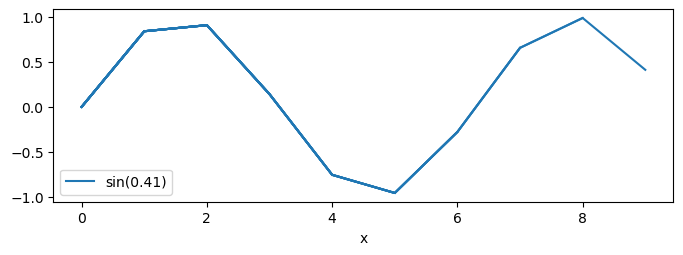

In [3]:
from dlbase.viz.board import ProgressBoard
import math

with ProgressBoard(xlabel='x') as progress_board:
    for x in range(0, 10):
        progress_board.draw(x, math.sin(x), 'sin')
